In [240]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from statsmodels.tsa.stattools import acf
import numpy as np

In [241]:
df = pd.read_csv("processed\data_processed_final.csv")

# Función para obtener el test de Dickey-Fuller para la serie de tiempo de cada jugador
def test_stationarity(player, y):
    player_data = df[df["Player"] == player]
    player_data = player_data.set_index("Fecha")
    player_data.index = pd.to_datetime(player_data.index)
    player_data = player_data[y]
    adf = adfuller(player_data)
    if adf[1] < 0.05:
        print(f"La serie de tiempo es estacionaria con un p-valor de {adf[1]}")
    else:
        print(f"La serie de tiempo no es estacionaria con un p-valor de {adf[1]}")

# Función para obtener el ACF y PACF de la serie de tiempo de cada jugador
def acf_pacf(player, y):
    player_data = df[df["Player"] == player]
    player_data = player_data.set_index("Fecha")
    player_data.index = pd.to_datetime(player_data.index)
    player_data = player_data[y]
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico ACF
    plot_acf(player_data, lags=100, ax=axes[0])
    axes[0].set_title("Autocorrelation (ACF)")
    
    # Gráfico PACF
    plot_pacf(player_data, lags=30, ax=axes[1])
    axes[1].set_title("Partial Autocorrelation (PACF)")
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()
    
# Función para obtener la descomposición de la serie de tiempo de cada jugador
def decompose(player, y, period):
    player_data = df[df["Player"] == player]
    player_data = player_data.set_index("Fecha")
    player_data.index = pd.to_datetime(player_data.index)
    player_data = player_data[y]
    decomposition = seasonal_decompose(player_data, model="additive", period=period)

    decomposition.plot()

In [242]:
for player in df["Player"].unique():
    print(f'-------------------{player}-------------------')
    test_stationarity(player, y = "last_performance")

-------------------Ferran-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0026095474934785187
-------------------Gerard Moreno-------------------
La serie de tiempo es estacionaria con un p-valor de 0.003555918253853182
-------------------Griezmann-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0001882580844833009
-------------------Koundé-------------------
La serie de tiempo es estacionaria con un p-valor de 0.00010951481266284167
-------------------Kubo-------------------
La serie de tiempo es estacionaria con un p-valor de 0.0018424663164316947
-------------------Lamine Yamal-------------------
La serie de tiempo es estacionaria con un p-valor de 0.000603938010507168
-------------------Lewandowski-------------------
La serie de tiempo es estacionaria con un p-valor de 0.00045048865976980305
-------------------Miguel Gutiérrez-------------------
La serie de tiempo es estacionaria con un p-valor de 0.014605832492917052
------------

Los valores de ADF parecen indicar que las series son estacionarias, es decir D=0.

## Rendimiento de los jugadores

### Ferrán

-------------------Ferran-------------------


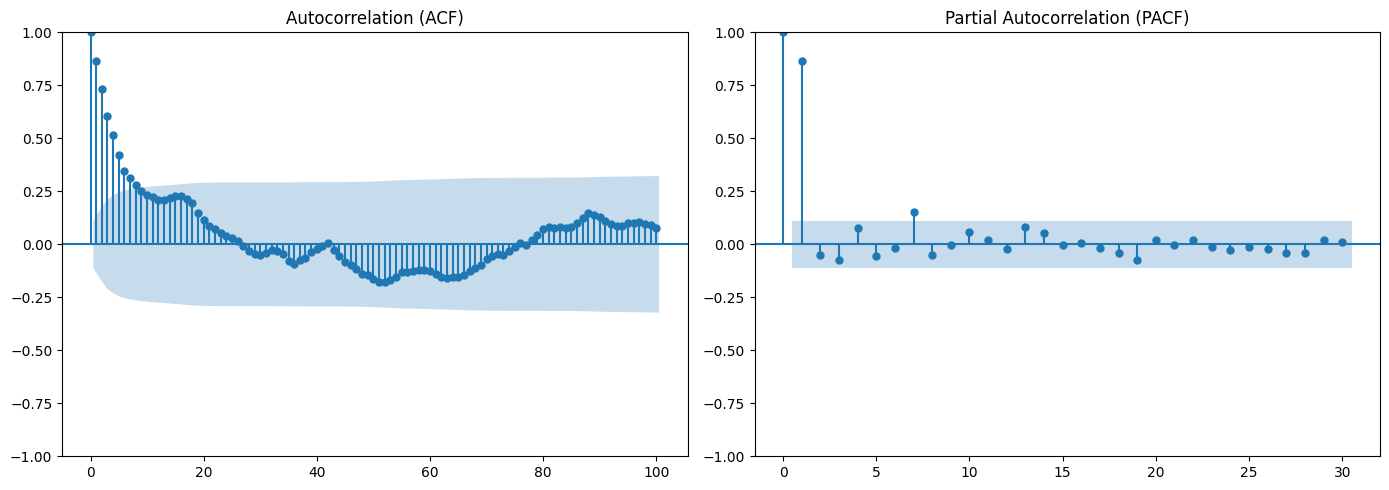

In [243]:
player_unique = df["Player"].unique()
y = "last_performance"
player = player_unique[0]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

Debido a la lenta caída de ACF es probable que se trate de una serie no estacionaria, así que se debería comprobar d=1. En cuanto a la p, se puede ver que solo el primer lag de PACF sobrepasa la zona, por lo que se utilizará un modelo AR(1), para la q, no parece haber picos significativos. Por lo que un modelo a iniciar podría ser ARIMA(1,1,0), pero también se podrían considerar (2,1,0) o (1,1,1).

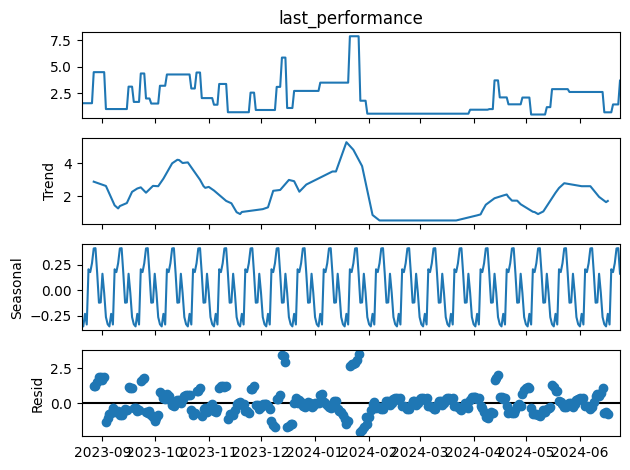

In [244]:
decompose(player, y, 15)

Comprobando el pico en el lag 15 de ACF, parece que existe una estacionalidad.

A probar ARIMA con órdenes (1,1,0), (2,1,0), (1,1,1) y con orden estacional de periodo 15.

### Gerard Moreno

-------------------Gerard Moreno-------------------


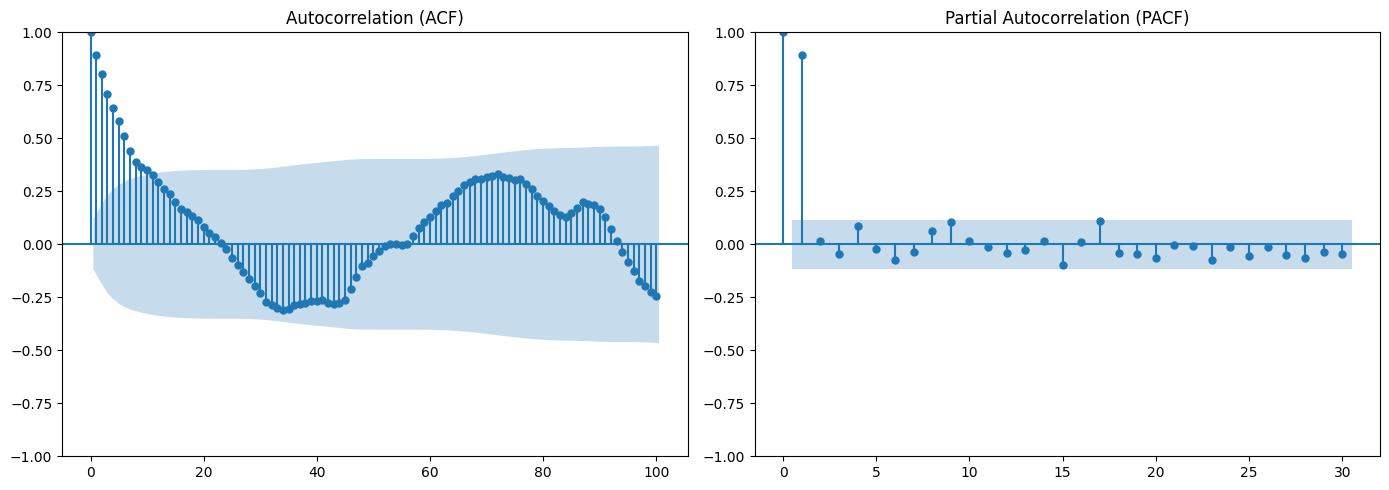

In [245]:
player = player_unique[1]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

De nuevo convendría comprobar si d=1, debido a la lenta bajada de ACF. p es un claro 1, y q probablemente 0 ya que tampoco hay términos claros. ARIMA(1,1,0), y comprobar si (1,1,1) mejora el modelo.

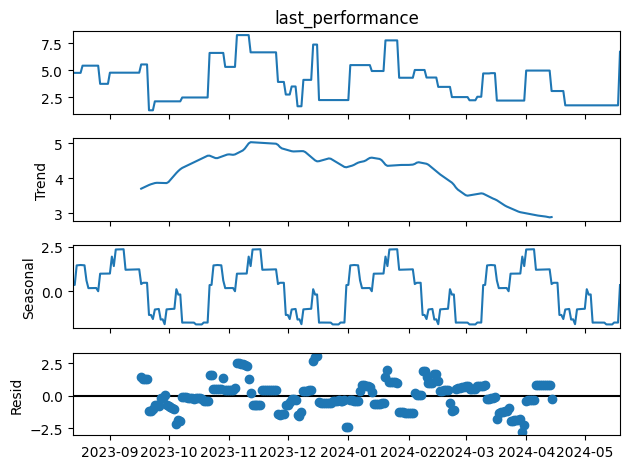

In [246]:
decompose(player, y, 70)

Aunque no aparezcan picos relevantes en el ACF que puedan indicar estacionalidad, si que hay un máximo en lag 70 que podría señalar a una estacionalidad de periodo 70.

A probar ARIMA con órdenes (1,1,0), (1,1,1) y un orden estacional con periodo 70.

### Griezmann

-------------------Griezmann-------------------


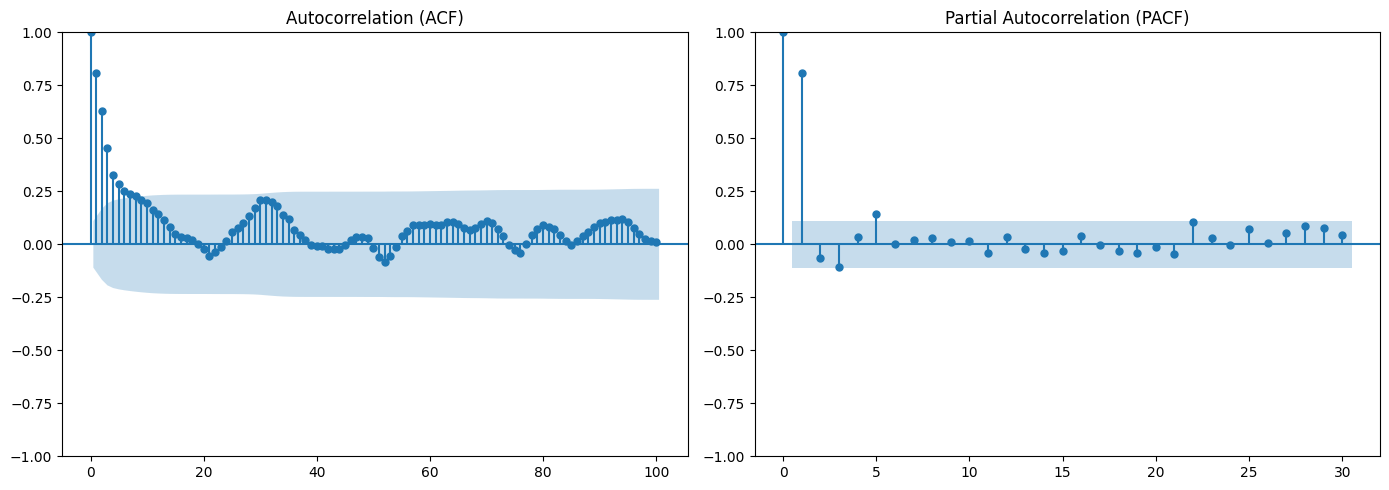

In [247]:
player = player_unique[2]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

De nuevo una caída lenta en ACF, que puede indicar d=1. p=1 y q desconocida. ARIMA(1,1,0) y comprobar (1,1,1). También es posible ARIMA(2,1,0) ya que hay otro pico en PACF.

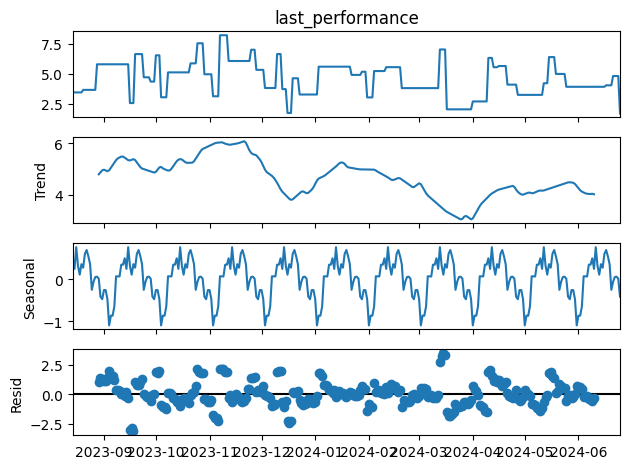

In [248]:
decompose(player, y, 30)

Como en el caso anterior la estacionalidad no es clara ya que no hay picos significativos, pero una estacionalidad de periodo 30 podría existir.

ARIMA con órdenes (1,1,0), (2,1,0), (1,1,1) y quiza un orden estacional de periodo 30.

### Koundé

-------------------Koundé-------------------


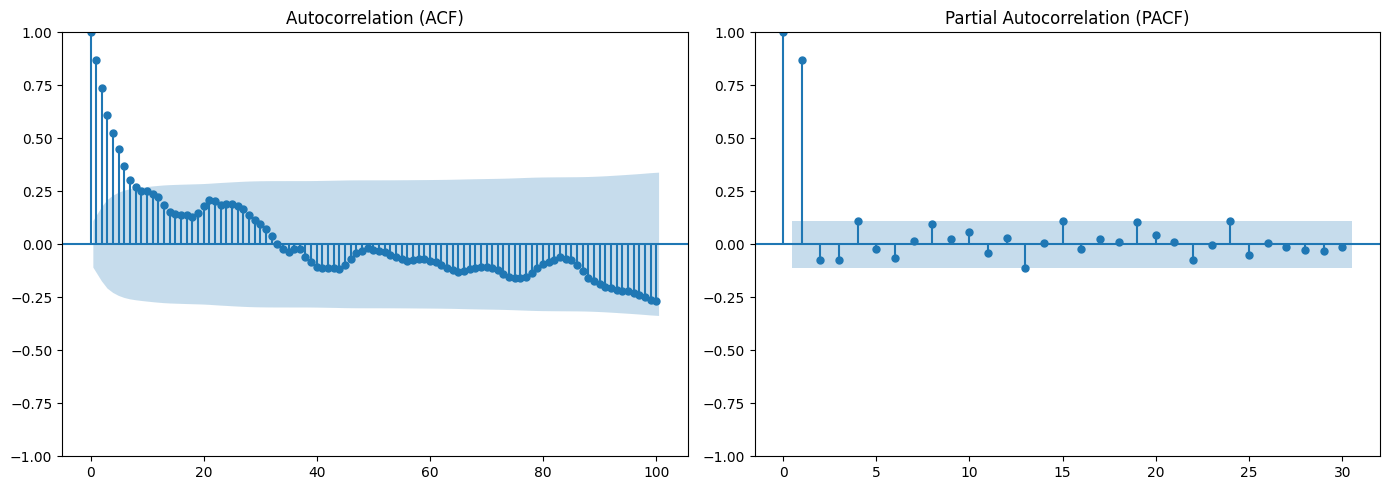

In [249]:
player = player_unique[3]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

La mismas conclusiones, ARIMA(1,1,0) y comprobar q=1.

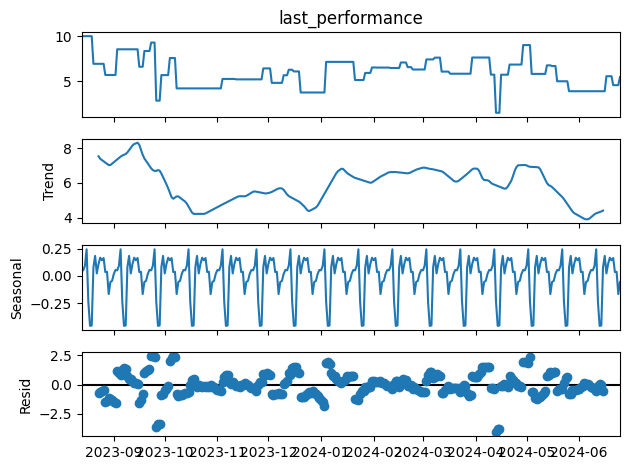

In [250]:
decompose(player, y, 20)

Comprobamos la estacionalidad en el pico del lag 20, no parece ser un estacionalidad real.

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Kubo

-------------------Kubo-------------------


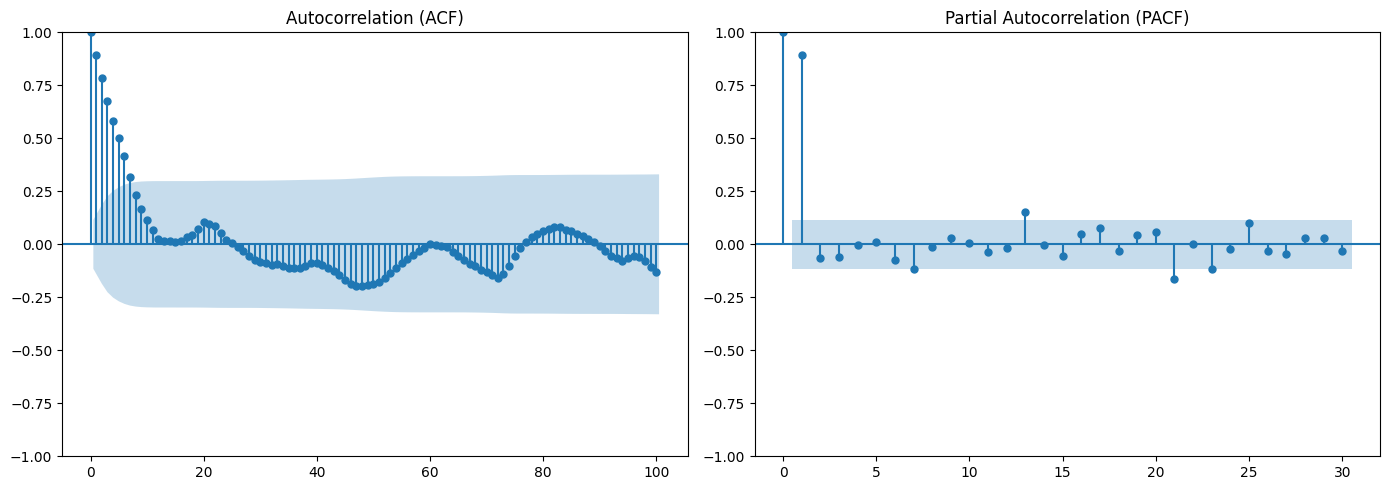

In [251]:
player = player_unique[4]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

De nuevo mismas conclusiones, ARIMA(1,1,0), y comprobar (1,1,1).

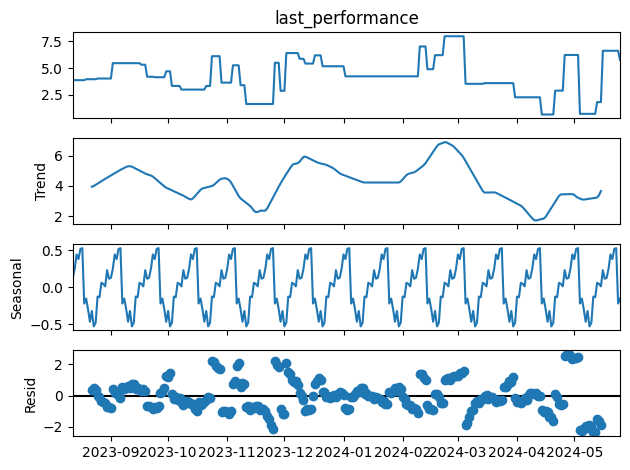

In [252]:
decompose(player, y, 20)

Se comprueba de nuevo estacionalidad en periodo 20, pero no se encuentra.

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Lamine Yamal

-------------------Lamine Yamal-------------------


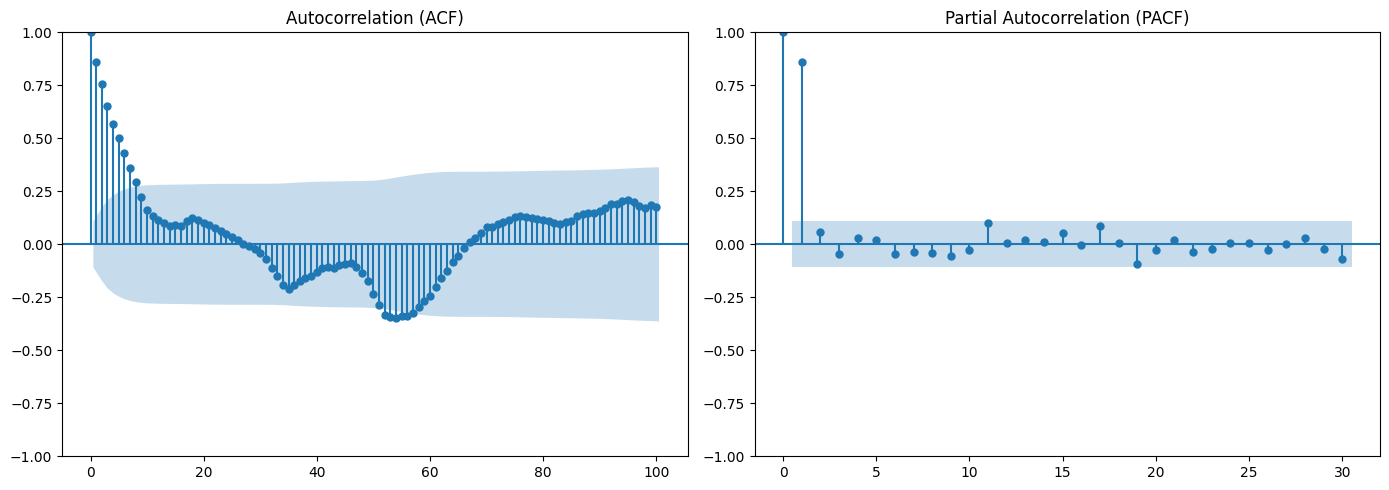

In [253]:
player = player_unique[5]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

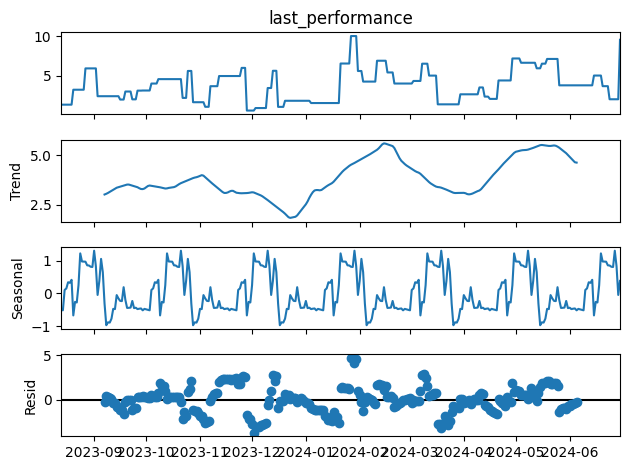

In [254]:
decompose(player, y, 50)

Comprobamos si el pico en el lag 50 indica una estacionalidad, no queda muy claro pero puede convenir comprobarlo.

A probar ARIMA con órdenes (1,1,0), (1,1,1) y un orden estacional

### Lewandowski

-------------------Lewandowski-------------------


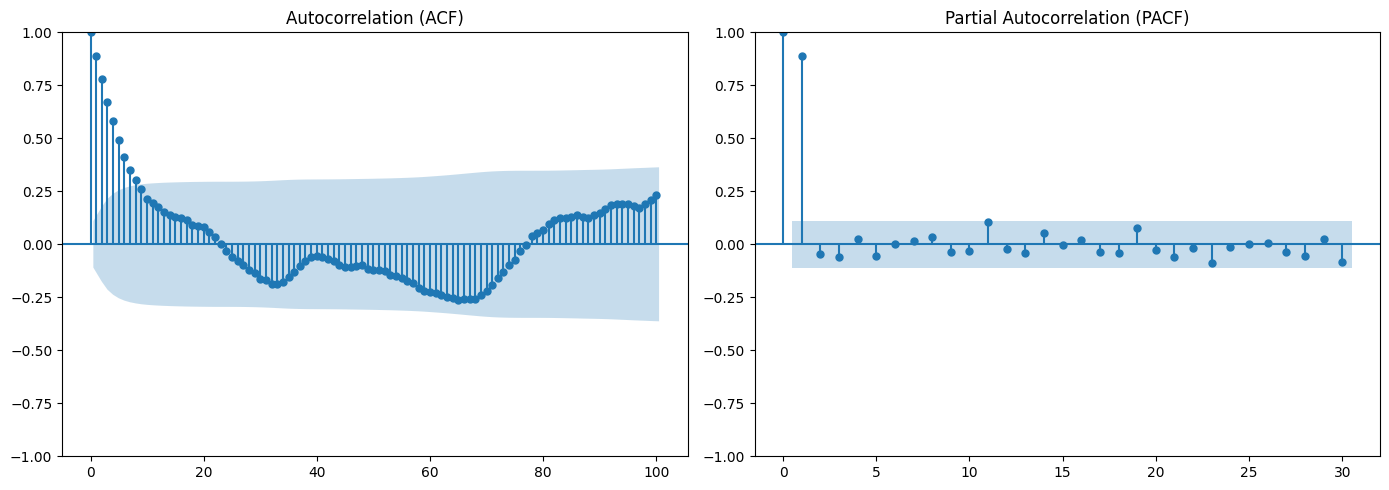

In [255]:
player = player_unique[6]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

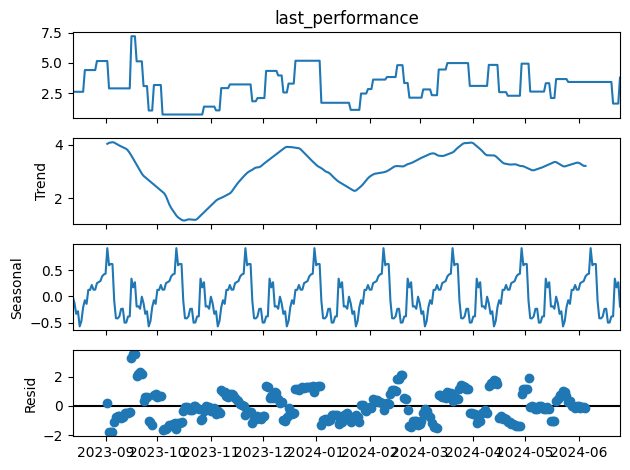

In [256]:
decompose(player, y, 40)

Posible estacionalidad con periodo 40.

A probar ARIMA con órdenes (1,1,0), (1,1,1) y un orden estacional con periodo 40.

### Miguel Gutiérrez

-------------------Miguel Gutiérrez-------------------


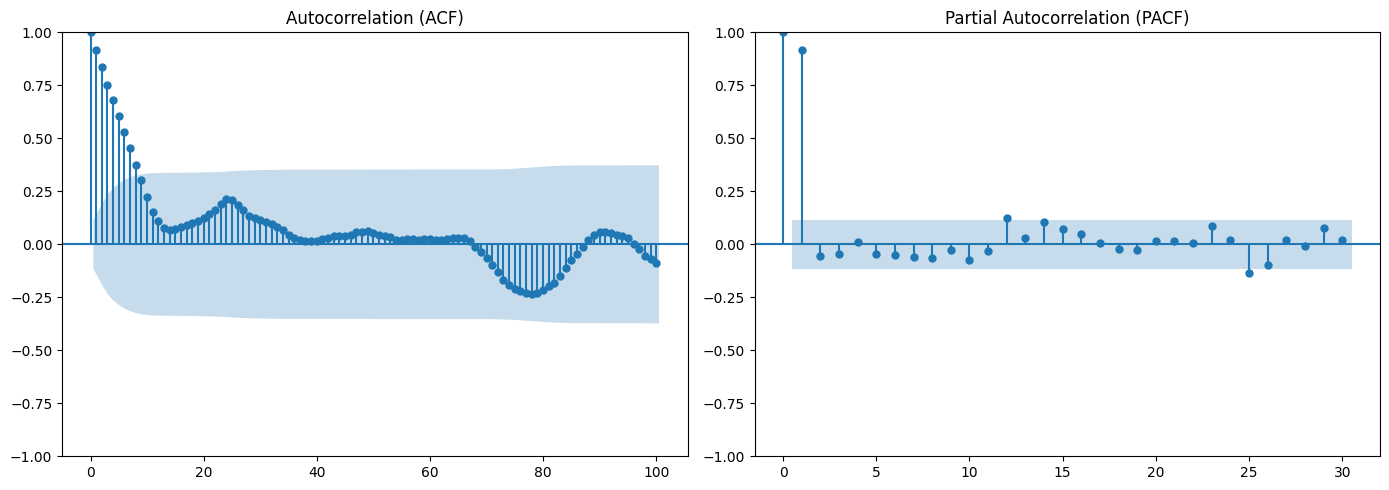

In [257]:
player = player_unique[7]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

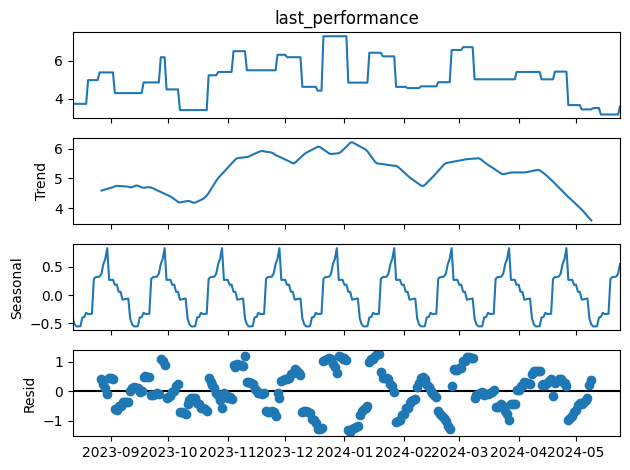

In [258]:
decompose(player, y, 30)

Se puede distinguir una pequeña estacionalidad con periodo 30.

A probar ARIMA con órdenes (1,1,0), (1,1,1) y un orden estacional de periodo 30.

### Mikel Merino

-------------------Mikel Merino-------------------


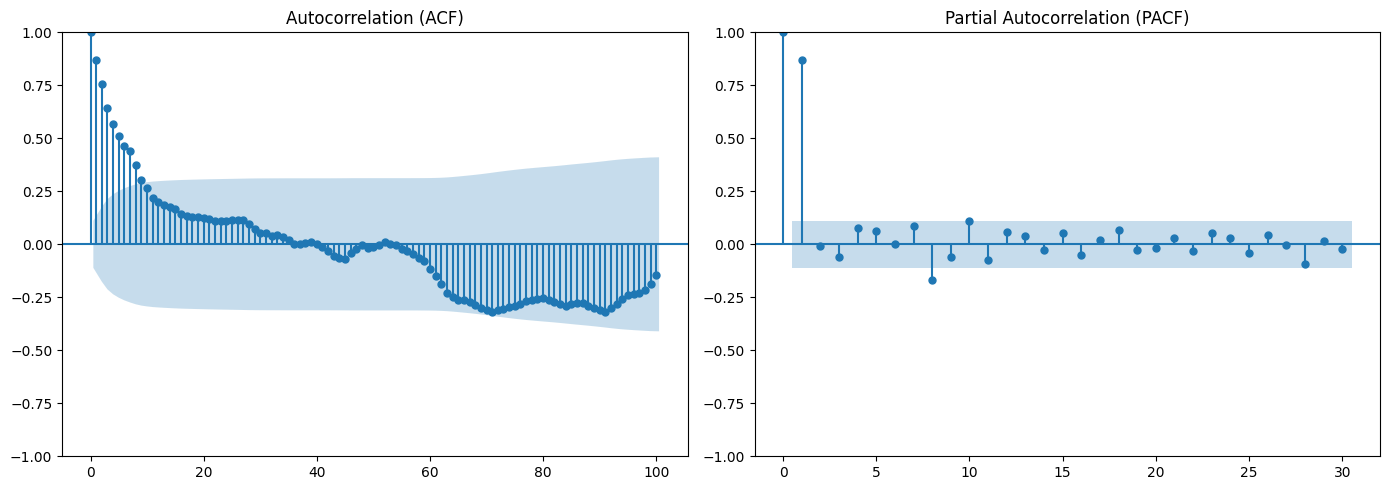

In [259]:
player = player_unique[8]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Morata

-------------------Morata-------------------


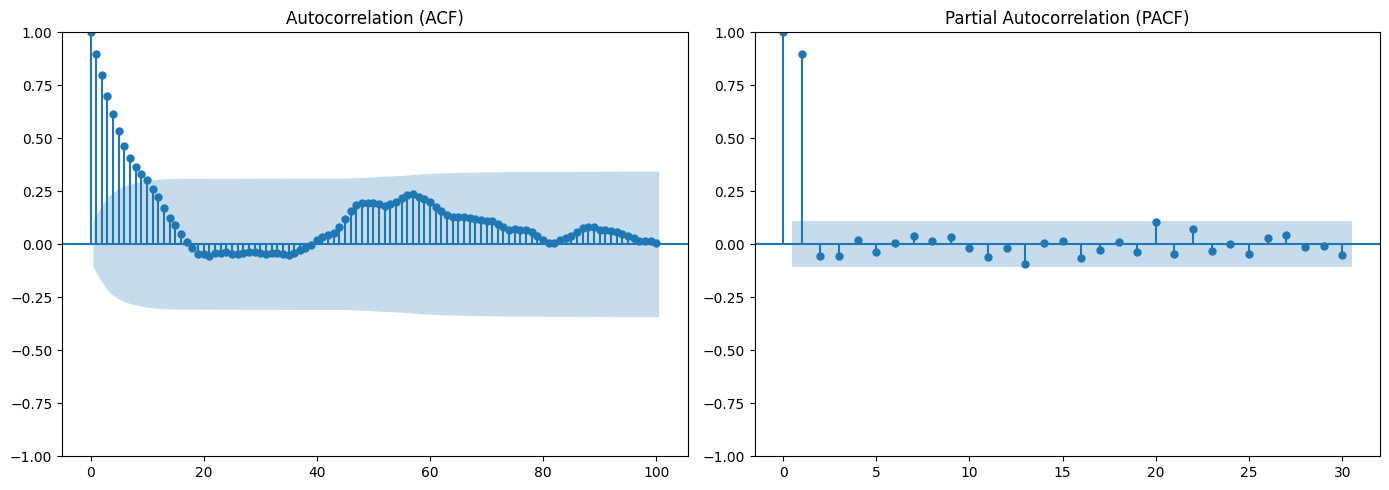

In [260]:
player = player_unique[9]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

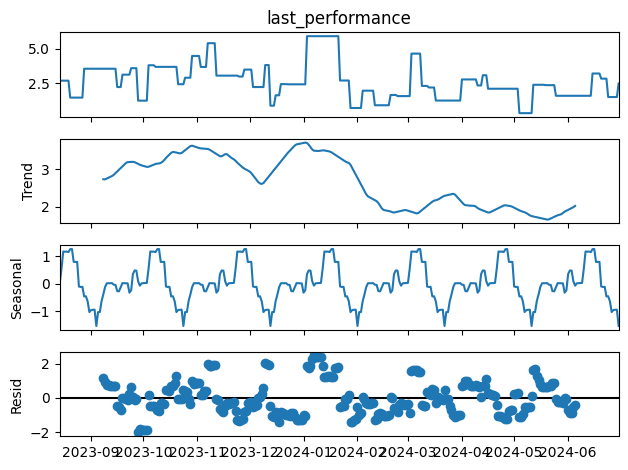

In [261]:
decompose(player, y, 50)

Posible estacionalidad de periodo 50

A probar ARIMA con órdenes (1,1,0), (1,1,1) y con orden estacional de periodo 50.

### Nico Williams

-------------------Nico Williams-------------------


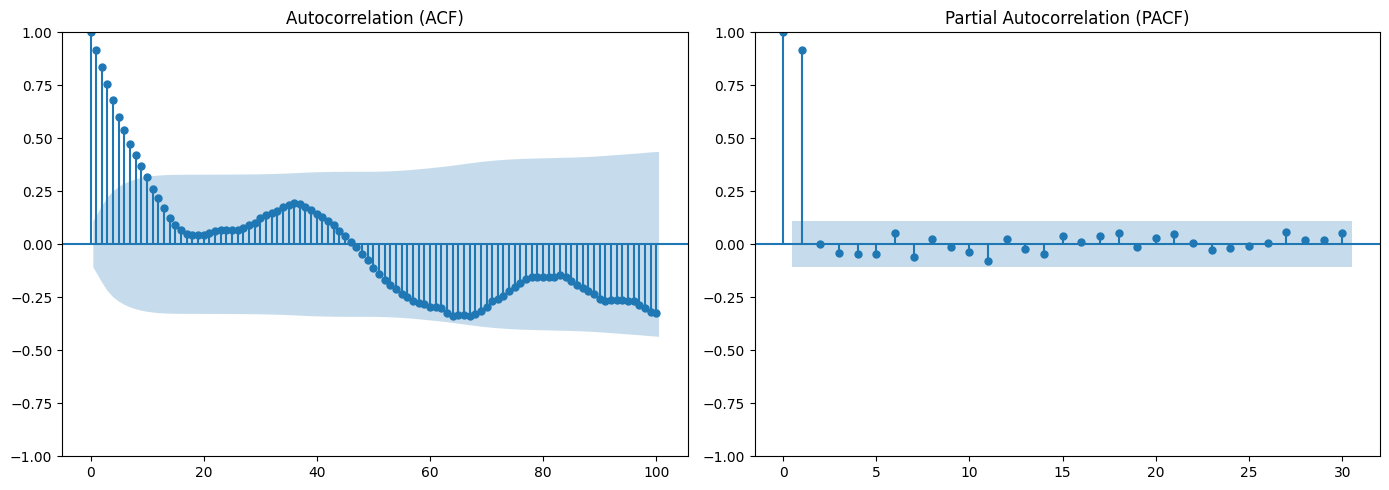

In [262]:
player = player_unique[10]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

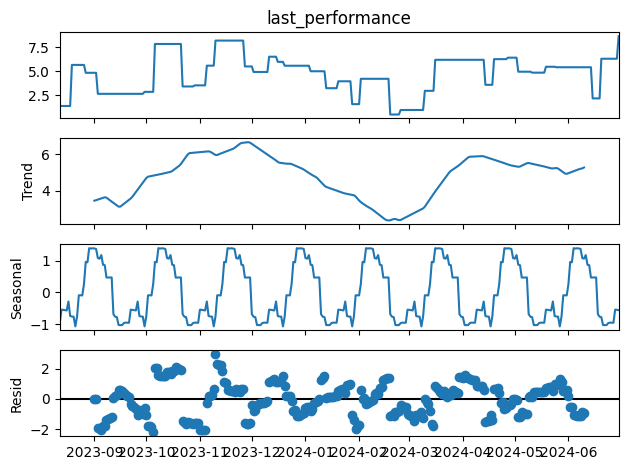

In [263]:
decompose(player, y, 40)

Aunque los picos se encuentran dentro de la zona, parece existir una estacionalidad de periodo 40

A probar ARIMA con órdenes (1,1,0), (1,1,1) y un orden estacional de periodo 40.

### Óscar Mingueza

-------------------Oscar Mingueza-------------------


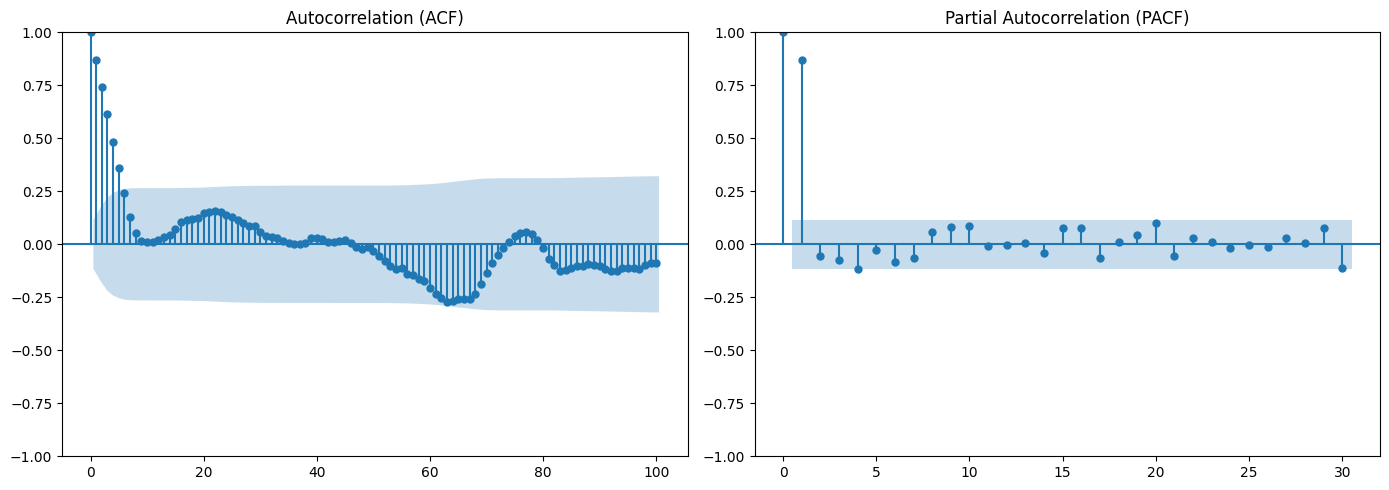

In [264]:
player = player_unique[11]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Vinicius

-------------------Vinicius-------------------


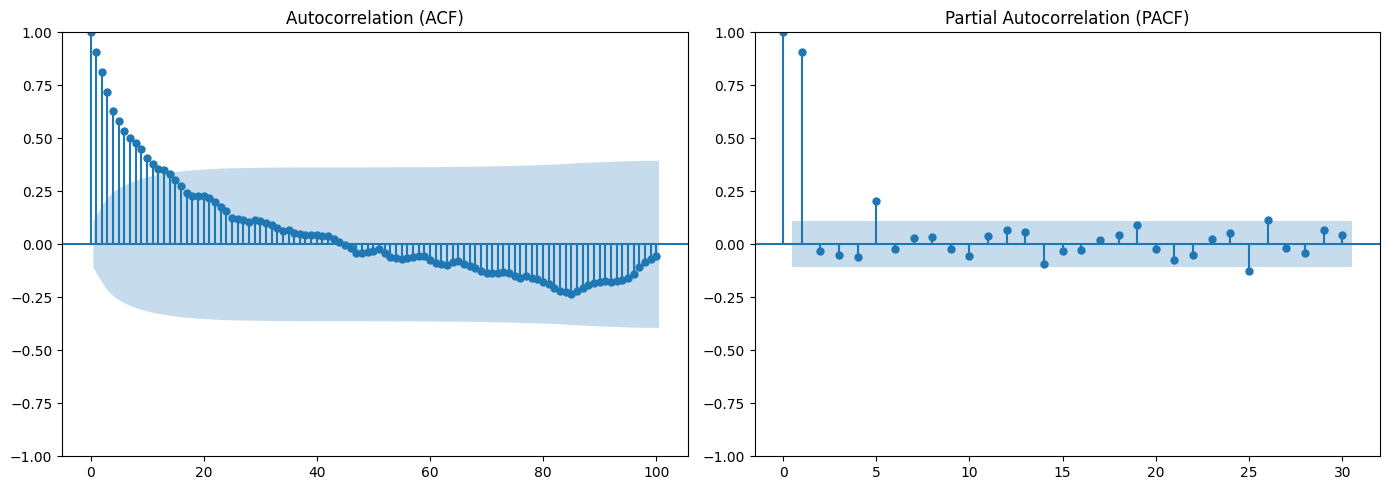

In [265]:
player = player_unique[12]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

Por último esta serie parece seguir la misma moda, ARIMA(1,1,0) con posibilidad de (2,1,0), o una q mayor.

A probar ARIMA con órdenes (1,1,0), (2,1,0), (1,1,1).

## Sentimiento acumulado de los jugadores

### Ferrán

-------------------Ferran-------------------


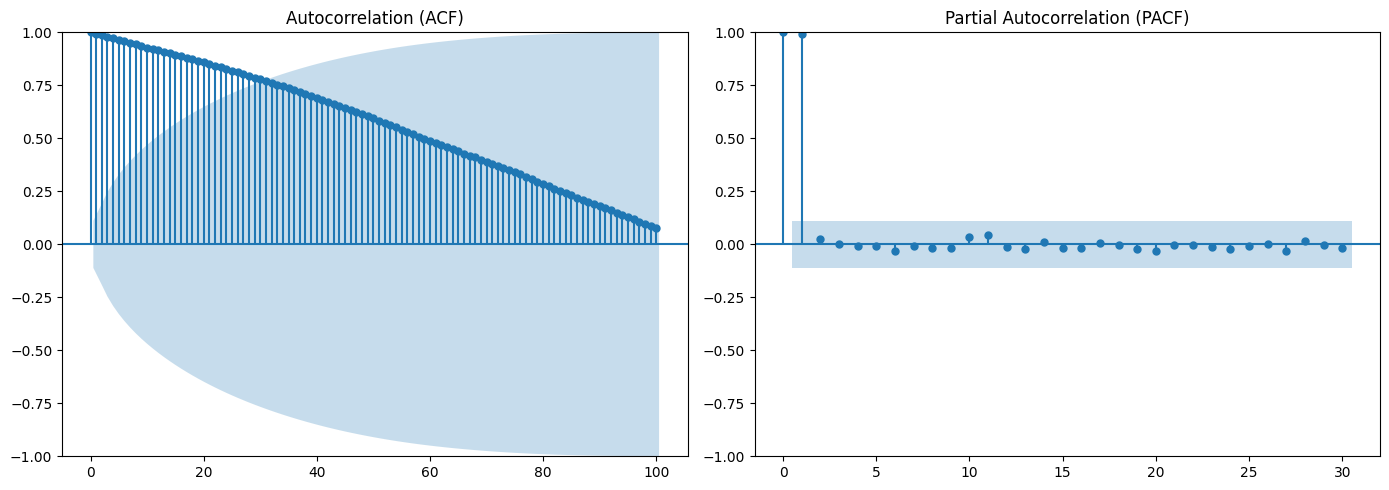

In [266]:
# Evaluamos los mejores hiperparámetros para la serie de tiempo de los sentimientos acumulados
y = 'Sentimientos_acumulado'
player = player_unique[0]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

En este caso la no estacionariedad es clara (d=1), p será 1 debido al único pico de PACF estar ubicado en el lag 1, y q parece ser 0 al no existir picos relevantes en ACF.

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Gerard Moreno

-------------------Gerard Moreno-------------------


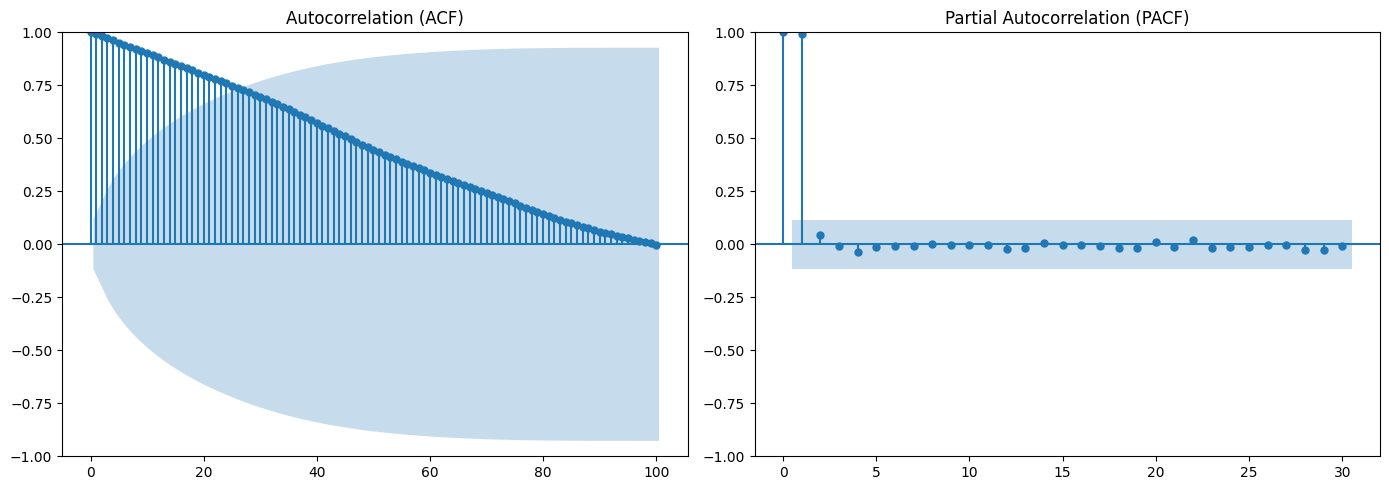

In [267]:
player = player_unique[1]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Griezmann

-------------------Griezmann-------------------


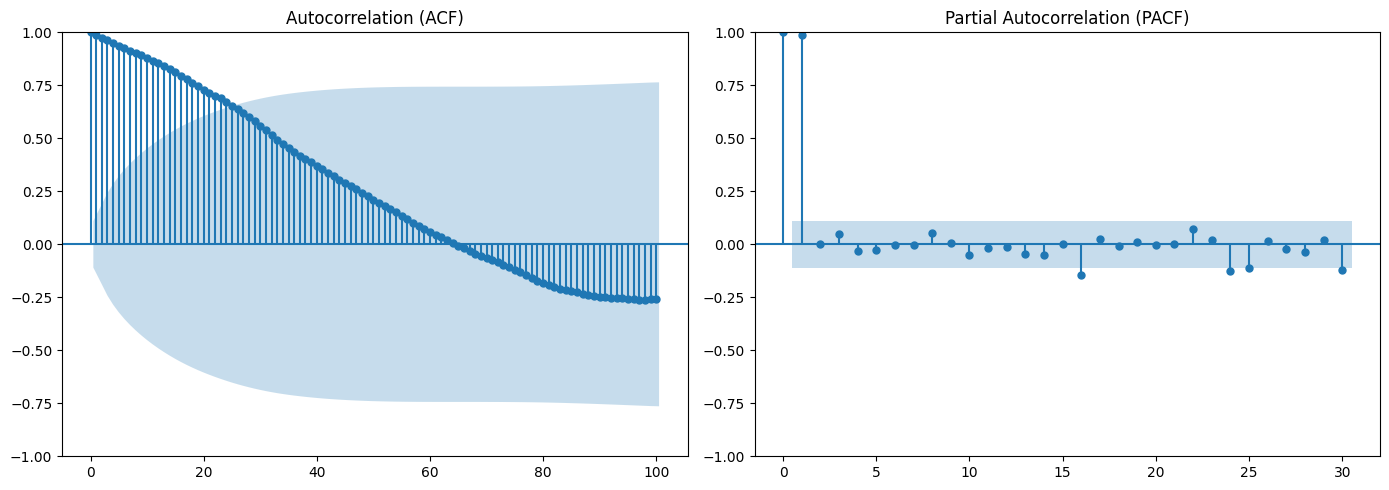

In [268]:
player = player_unique[2]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Koundé

-------------------Koundé-------------------


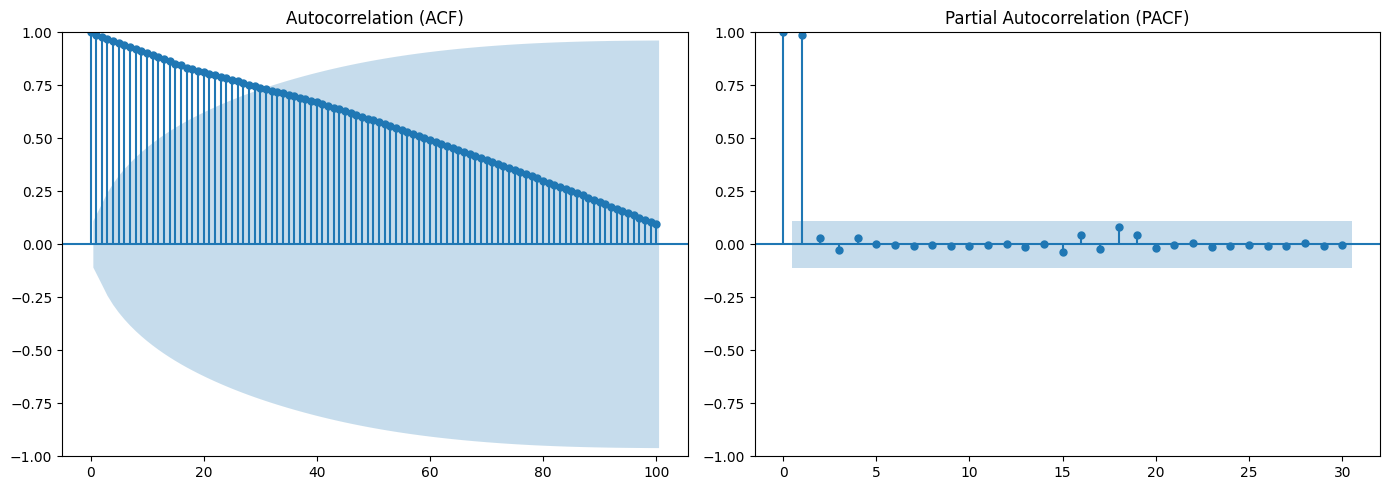

In [269]:
player = player_unique[3]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Kubo

-------------------Kubo-------------------


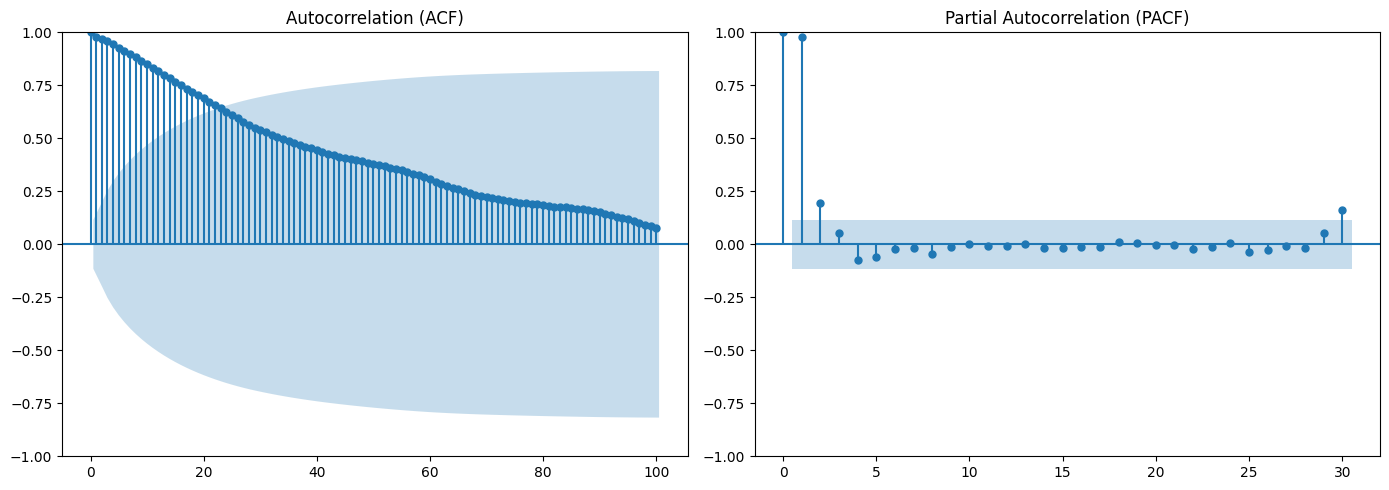

In [270]:
player = player_unique[4]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

En este caso aunque d parece ser 1 de nuevo y q 0. Es más pausible que p sea 2 ya que existe un segundo pico menos relevante en PACF en el lag 2. ARIMA(1,1,0), (2,1,0) o (1,1,1).

A probar ARIMA con órdenes (1,1,0), (2,1,0), (1,1,1).

### Lamine Yamal

-------------------Lamine Yamal-------------------


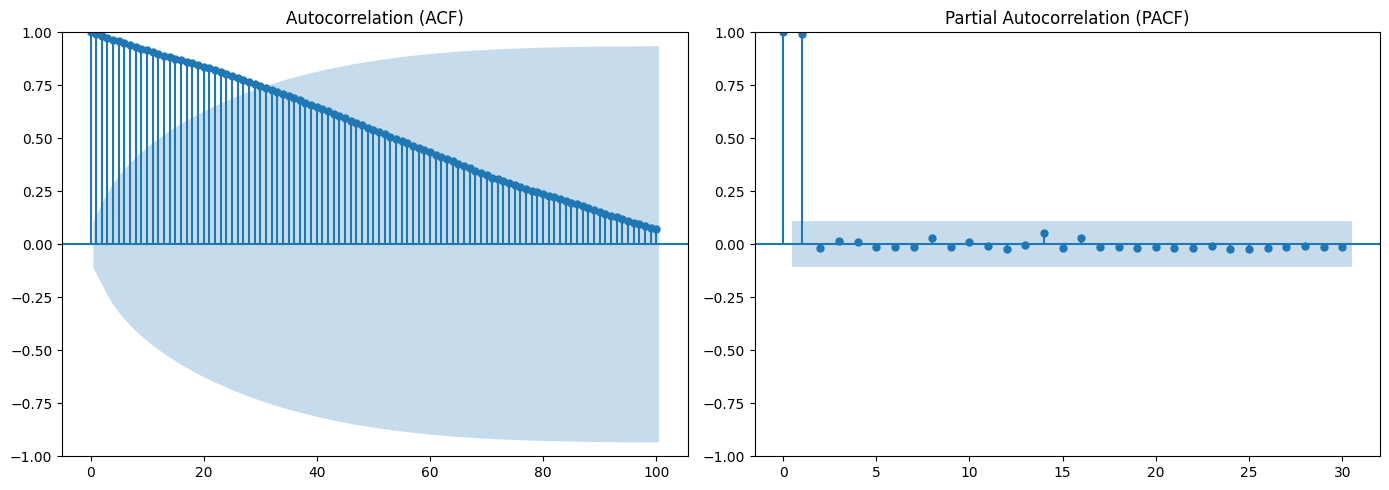

In [271]:
player = player_unique[5]   

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Lewandowski

-------------------Lewandowski-------------------


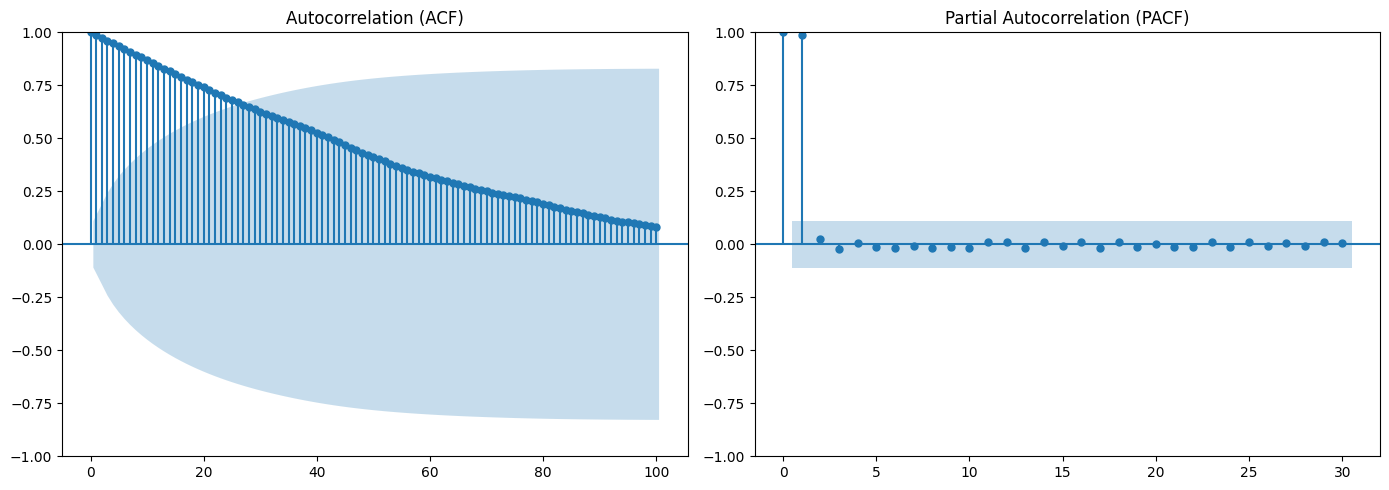

In [272]:
player = player_unique[6]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Miguel Gutiérrez

-------------------Miguel Gutiérrez-------------------


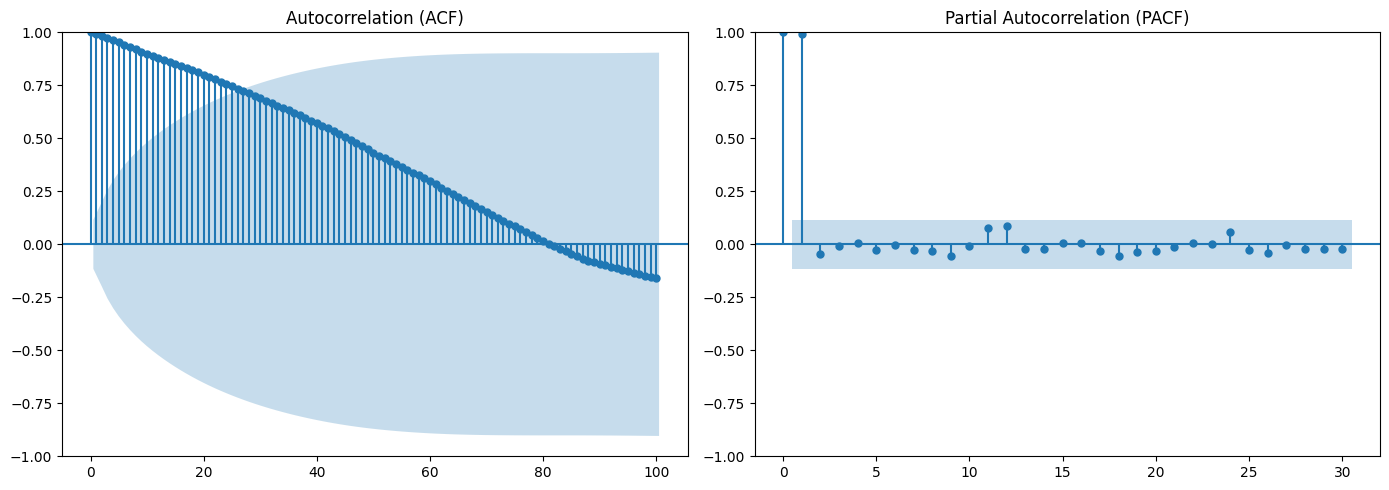

In [273]:
player = player_unique[7]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Mikel Merino

-------------------Mikel Merino-------------------


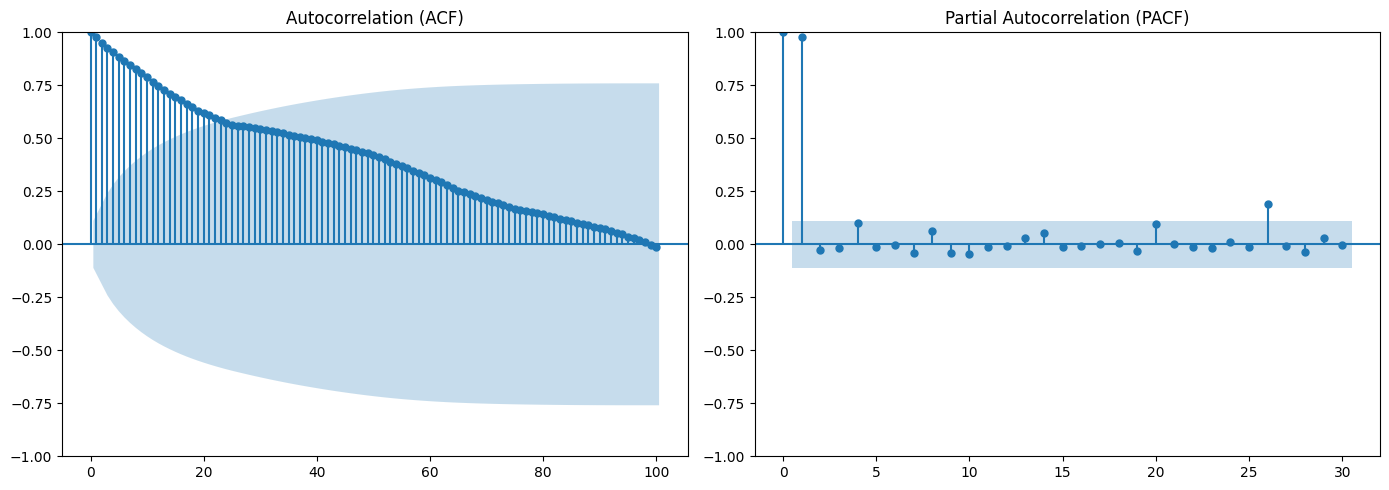

In [274]:
player = player_unique[8]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Morata

-------------------Morata-------------------


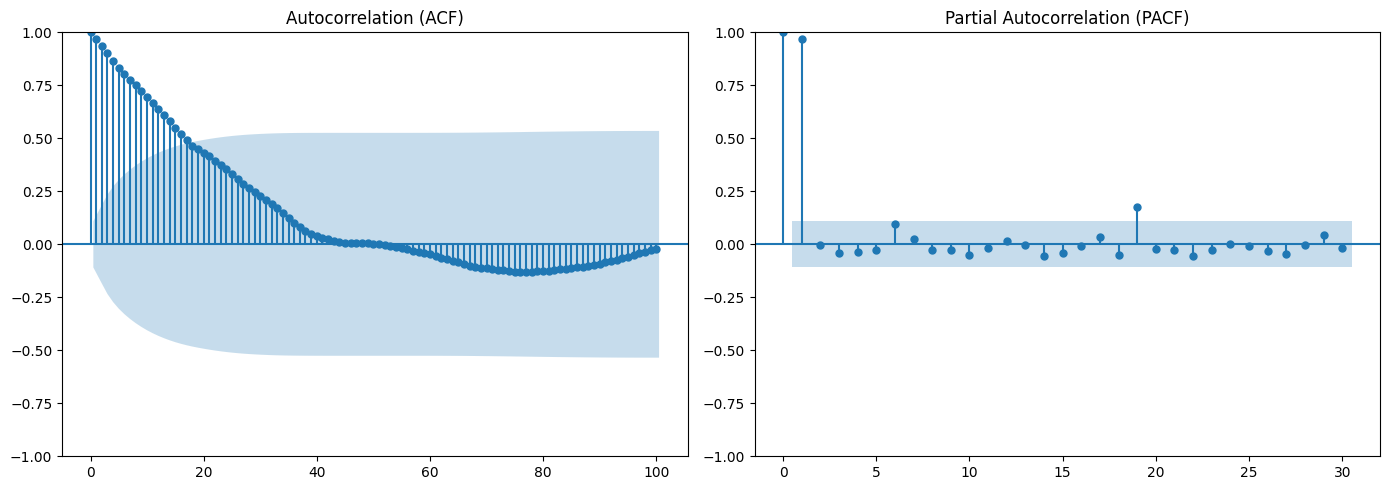

In [275]:
player = player_unique[9]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).

### Nico Williams

-------------------Nico Williams-------------------


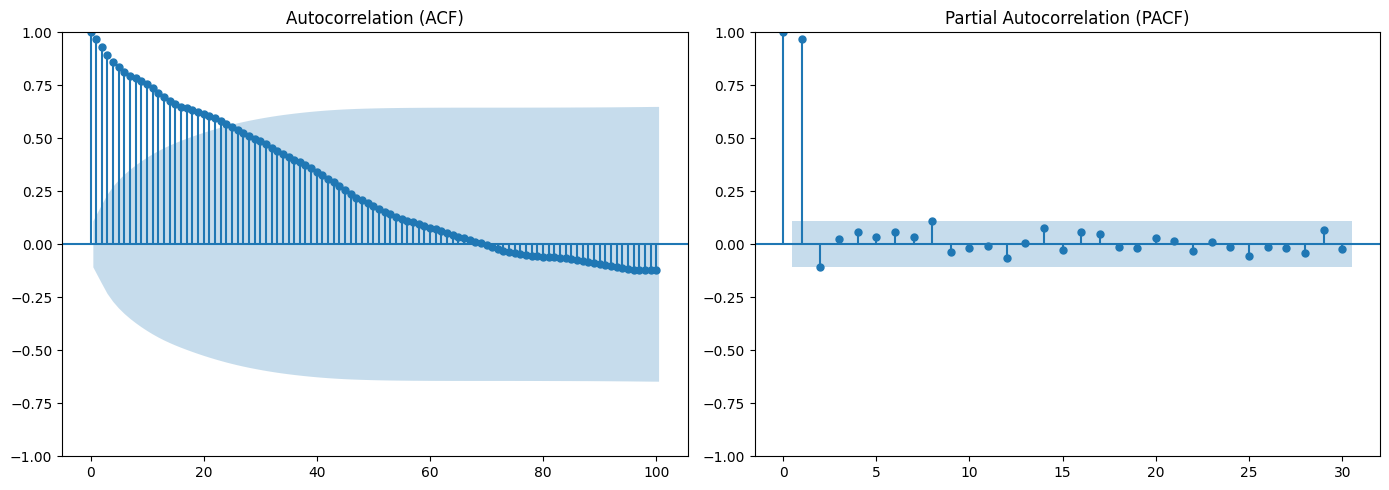

In [276]:
player = player_unique[10]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

Más posibilidad de un p=2.

A probar ARIMA con órdenes (1,1,0), (2,1,0), (1,1,1).

### Vinicius

-------------------Vinicius-------------------


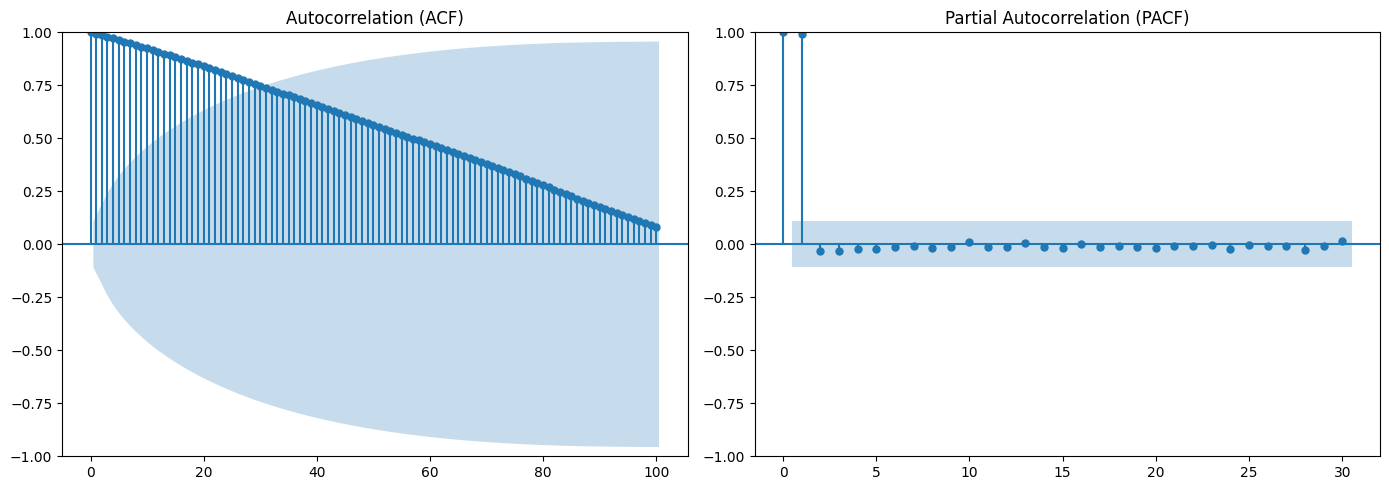

In [277]:
player = player_unique[12]

print(f'-------------------{player}-------------------')

acf_pacf(player, y)

A probar ARIMA con órdenes (1,1,0), (1,1,1).